<p style="font-size:32px;text-align:center"> <b>Stroke Prediction</b> </p>

# Introduction

- A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood    supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.

- Risk factors for stroke

Certain risk factors make you more susceptible to stroke. According to the National Heart, Lung, and Blood InstituteTrusted Source, the more risk factors you have, the more likely you are to have a stroke. Risk factors for stroke include:

**Diet**

An unhealthy diet that increases your risk of stroke is one that’s high in:

    salt
    saturated fats
    trans fats
    cholesterol

**Inactivity**

Inactivity, or lack of exercise, can also raise your risk for stroke.

Regular exercise has a number of health benefits. The CDC recommends that adults get at least 2.5 hoursTrusted Source of aerobic exercise every week. This can mean simply a brisk walk a few times a week.

**Alcohol consumption**

Your risk for stroke also increases if you drink too much alcohol. Alcohol consumption should be done in moderation. This means no more than one drink per day for women, and no more than two for men. More than that may raise blood pressure levels as well as triglyceride levels, which can cause atherosclerosis.

**Tobacco use**

Using tobacco in any form also raises your risk for stroke, since it can damage your blood vessels and heart. This is further increased when smoking, because your blood pressure rises when you use nicotine.
Personal background

There are certain personal risk factors for stroke that you can’t control. Stroke risk can be linked to your:

    Family history: Stroke risk is higher in some families because of genetic health issues, such as high blood pressure.
    Sex: While both women and men can have strokes, they’re more common in women than in men in all age groups.
    Age: The older you are, the more likely you are to have a stroke.
    Race and ethnicity: Caucasians, Asian Americans, and Hispanics are less likely to have a stroke than African-Americans, Alaska Natives, and American Indians.

**Health history**

Certain medical conditions are linked to stroke risk. These include:

    a previous stroke or TIA
    high blood pressure
    high cholesterol
    heart disorders, such as coronary artery disease
    heart valve defects
    enlarged heart chambers and irregular heartbeats
    sickle cell disease
    diabetes
    
    
    
<img src="stroke.jpg" width=600 height=600 />

# Data 

1. id: unique identifier

2. gender: "Male", "Female" or "Other"

3. age: age of the patient

4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. ever_married: "No" or "Yes"

7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. Residence_type: "Rural" or "Urban"

9. avg_glucose_level: average glucose level in blood

10. bmi: body mass index

11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. stroke: 1 if the patient had a stroke or 0 if not

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**

# Importing Libraries and Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier as rgb
from xgboost import XGBRFClassifier as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score

from sklearn.ensemble import StackingClassifier
from prettytable import PrettyTable, MSWORD_FRIENDLY, DEFAULT

In [2]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke.shape

(5110, 12)

# Cleaning of Data

In [7]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
stroke.bmi.replace(to_replace=np.nan, value=stroke.bmi.mean(), inplace=True)

In [9]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis

In [10]:
stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [11]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Our data is imbalanced.**

In [12]:
stroke.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
stroke.hypertension.unique()

array([0, 1], dtype=int64)

In [14]:
stroke.heart_disease.unique()

array([1, 0], dtype=int64)

In [15]:
stroke.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
stroke.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
stroke.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
stroke.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Univariate  Analysis

### Boxplot of bmi

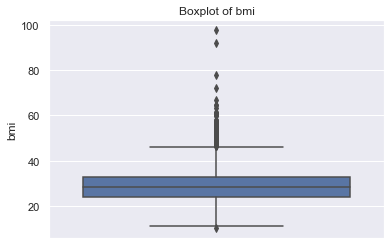

In [19]:
sns.boxplot(data=stroke, y='bmi')
plt.title('Boxplot of bmi')
plt.show()

In [20]:
for i in range(0, 110, 10):
    print(f'The {i}th percentile of BMI is: {np.percentile(stroke.bmi, i)}')

The 0th percentile of BMI is: 10.3
The 10th percentile of BMI is: 19.890000000000004
The 20th percentile of BMI is: 22.7
The 30th percentile of BMI is: 24.8
The 40th percentile of BMI is: 26.699999999999996
The 50th percentile of BMI is: 28.4
The 60th percentile of BMI is: 29.5
The 70th percentile of BMI is: 31.6
The 80th percentile of BMI is: 34.3
The 90th percentile of BMI is: 38.7
The 100th percentile of BMI is: 97.6


In [21]:
for i in range(90, 101, 1):
    print(f'The {i}th percentile of BMI is: {np.percentile(stroke.bmi, i)}')

The 90th percentile of BMI is: 38.7
The 91th percentile of BMI is: 39.3
The 92th percentile of BMI is: 40.0
The 93th percentile of BMI is: 40.8
The 94th percentile of BMI is: 41.7
The 95th percentile of BMI is: 42.65500000000002
The 96th percentile of BMI is: 43.8
The 97th percentile of BMI is: 45.1
The 98th percentile of BMI is: 48.08199999999997
The 99th percentile of BMI is: 52.890999999999984
The 100th percentile of BMI is: 97.6


In [22]:
for i in np.arange(0, 1.1, 0.1):
    print(f'The {99+i}th percentile of BMI is: {np.percentile(stroke.bmi, 99+i)}')

The 99.0th percentile of BMI is: 52.890999999999984
The 99.1th percentile of BMI is: 53.801900000000025
The 99.2th percentile of BMI is: 54.33839999999991
The 99.3th percentile of BMI is: 54.72370000000001
The 99.4th percentile of BMI is: 55.37300000000023
The 99.5th percentile of BMI is: 55.9
The 99.6th percentile of BMI is: 56.938400000000186
The 99.7th percentile of BMI is: 57.83459999999995
The 99.8th percentile of BMI is: 60.9
The 99.9th percentile of BMI is: 64.75640000000021
The 100.0th percentile of BMI is: 97.6


**From the above calculations we can see that 99.9% of people have BMI less than 65.**

### Boxplot of Average Glucose Level

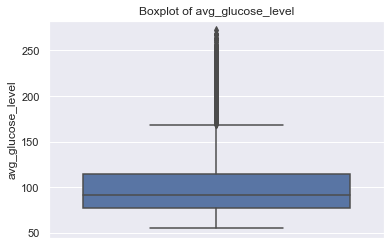

In [23]:
sns.boxplot(data=stroke, y='avg_glucose_level')
plt.title('Boxplot of avg_glucose_level')
plt.show()

In [24]:
for i in range(0, 110, 10):
    print(f'The {i}th percentile of Average Glucose Level is: {np.percentile(stroke.avg_glucose_level, i)}')

The 0th percentile of Average Glucose Level is: 55.12
The 10th percentile of Average Glucose Level is: 65.789
The 20th percentile of Average Glucose Level is: 73.76
The 30th percentile of Average Glucose Level is: 80.03800000000001
The 40th percentile of Average Glucose Level is: 85.6
The 50th percentile of Average Glucose Level is: 91.88499999999999
The 60th percentile of Average Glucose Level is: 98.914
The 70th percentile of Average Glucose Level is: 108.51599999999999
The 80th percentile of Average Glucose Level is: 124.16
The 90th percentile of Average Glucose Level is: 192.1810000000001
The 100th percentile of Average Glucose Level is: 271.74


In [25]:
for i in range(90, 101):
    print(f'The {i}th percentile of Average Glucose Level is: {np.percentile(stroke.avg_glucose_level, i)}')

The 90th percentile of Average Glucose Level is: 192.1810000000001
The 91th percentile of Average Glucose Level is: 197.54760000000002
The 92th percentile of Average Glucose Level is: 202.1020000000001
The 93th percentile of Average Glucose Level is: 206.43329999999997
The 94th percentile of Average Glucose Level is: 210.9546
The 95th percentile of Average Glucose Level is: 216.29450000000003
The 96th percentile of Average Glucose Level is: 220.14279999999985
The 97th percentile of Average Glucose Level is: 226.86919999999998
The 98th percentile of Average Glucose Level is: 231.91579999999993
The 99th percentile of Average Glucose Level is: 240.7082
The 100th percentile of Average Glucose Level is: 271.74


In [26]:
for i in np.arange(0, 1.1, 0.1):
    print(f'The {99+i}th percentile of Average Glucose Level is: {np.percentile(stroke.avg_glucose_level, 99+i)}')

The 99.0th percentile of Average Glucose Level is: 240.7082
The 99.1th percentile of Average Glucose Level is: 242.62418000000005
The 99.2th percentile of Average Glucose Level is: 243.5364
The 99.3th percentile of Average Glucose Level is: 244.78348000000017
The 99.4th percentile of Average Glucose Level is: 247.7522800000001
The 99.5th percentile of Average Glucose Level is: 249.29909999999998
The 99.6th percentile of Average Glucose Level is: 251.53896000000003
The 99.7th percentile of Average Glucose Level is: 253.90711
The 99.8th percentile of Average Glucose Level is: 256.3977400000002
The 99.9th percentile of Average Glucose Level is: 263.5338400000001
The 100.0th percentile of Average Glucose Level is: 271.74


### Boxplot of age

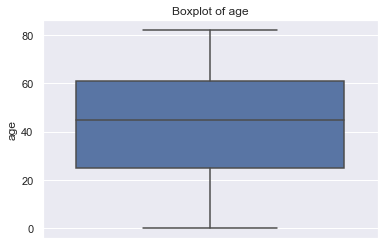

In [27]:
sns.boxplot(data=stroke, y='age')
plt.title('Boxplot of age')
plt.show()

## Bivariate Analysis

### Hypertension vs Stroke

Text(0.5, 1.0, 'Effect of Hypertension on Stroke')

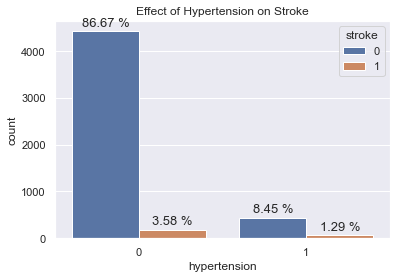

In [28]:
plots = sns.countplot(x='hypertension', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

    
plt.title('Effect of Hypertension on Stroke')

### Gender vs Stroke

Text(0.5, 1.0, 'Stroke based on Gender')

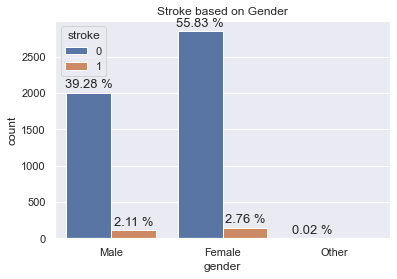

In [29]:
plots = sns.countplot(x='gender', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Stroke based on Gender')

### Heart Disease vs Stroke

Text(0.5, 1.0, 'Effect of Heart Disease on Stroke')

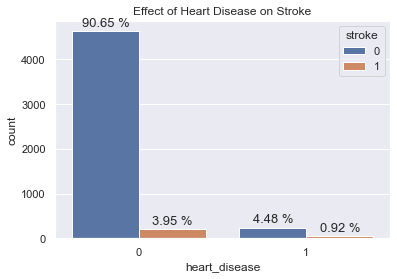

In [30]:
plots = sns.countplot(x='heart_disease', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Effect of Heart Disease on Stroke')

### Marital Status vs Stroke

Text(0.5, 1.0, 'Effect of Marital Status on Stroke')

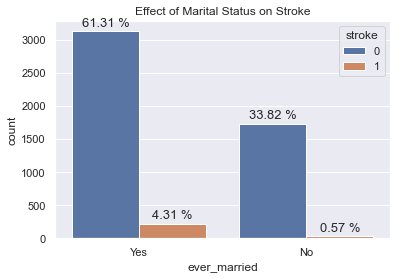

In [31]:
plots = sns.countplot(x='ever_married', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Effect of Marital Status on Stroke')

### Residence Type vs Stroke

Text(0.5, 1.0, 'Effect of Residence Type on Stroke')

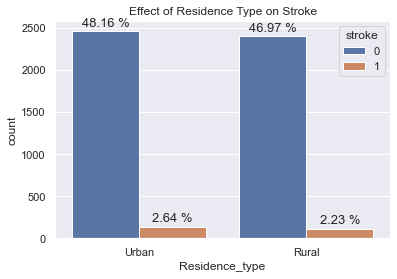

In [32]:
plots = sns.countplot(x='Residence_type', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Effect of Residence Type on Stroke')

### Work Type vs Stroke

Text(0.5, 1.0, 'Work Type of People')

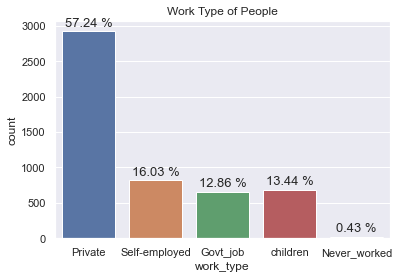

In [33]:
plots = sns.countplot(x='work_type', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Work Type of People')

Text(0.5, 1.0, 'Effect of Work Type on Stroke')

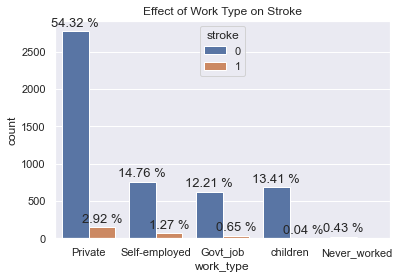

In [34]:
plots = sns.countplot(x='work_type', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Effect of Work Type on Stroke')

### Smoking vs Stroke

Text(0.5, 1.0, 'Number of Smokers/Non Smokers')

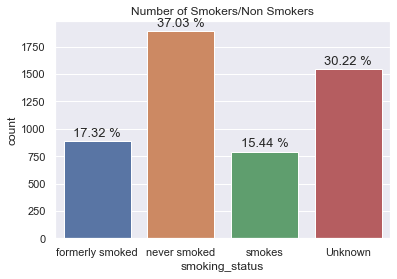

In [35]:
plots = sns.countplot(x='smoking_status', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Number of Smokers/Non Smokers')

Text(0.5, 1.0, 'Effect of Smoking on Stroke')

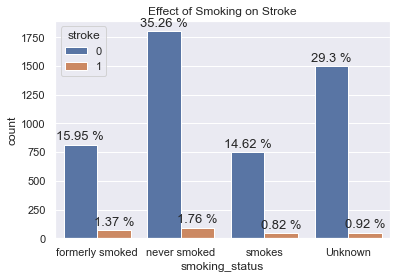

In [36]:
plots = sns.countplot(x='smoking_status', hue='stroke', data=stroke)

for bar in plots.patches:
    plots.annotate(f'{round(bar.get_height()/len(stroke)*100,2)} %', xy=(bar.get_x() + bar.get_width() / 2,  
                   bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.title('Effect of Smoking on Stroke')

In [37]:
correlation = stroke.corr()

## Correlation Heatmap

<AxesSubplot:>

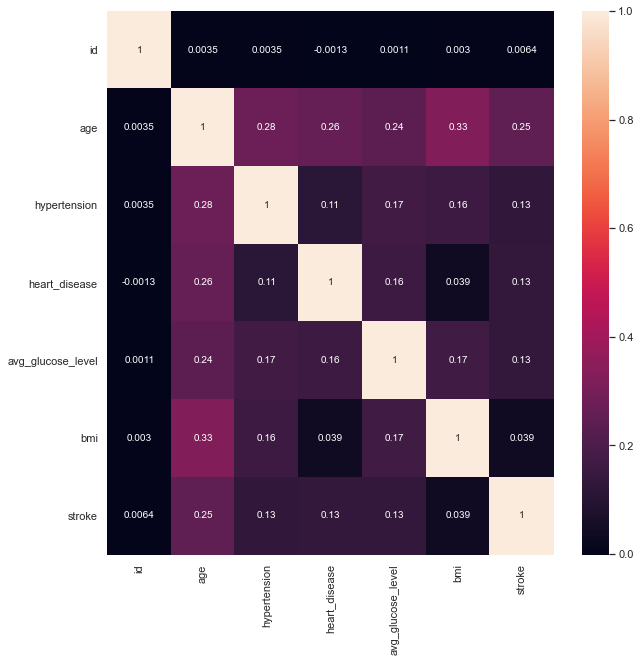

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

# Removing Outliers and Redundant Columns

In [39]:
stroke.drop(labels='id', axis=1, inplace=True)

In [40]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [41]:
stroke.drop(stroke[stroke.bmi>65].index, inplace=True)
stroke.shape

(5105, 11)

In [42]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Machine Learning Models

## Splitting The Dataset

Splitting the dataset into train and test in 80:20.

In [43]:
x = stroke.iloc[:,:-1]
y = stroke.iloc[:,-1]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [45]:
x_train.shape

(3267, 10)

In [46]:
x_test.shape

(1021, 10)

In [47]:
y_train.value_counts()

0    3108
1     159
Name: stroke, dtype: int64

In [48]:
rom = RandomOverSampler(random_state=42)
x_train, y_train = rom.fit_resample(x_train, y_train)

In [49]:
x_train.shape

(6216, 10)

In [50]:
y_train.value_counts()

0    3108
1    3108
Name: stroke, dtype: int64

## One-Hot Encoding of Categorical Data

In [51]:
ohe = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])], remainder='passthrough')
ohe.fit(x_train)
print(x_train.shape, y_train.shape)

x_train_ohe = ohe.transform(x_train)
x_cv_ohe = ohe.transform(x_cv)
x_test_ohe = ohe.transform(x_test)

print('After Vectorization......')
print(x_train_ohe.shape, y_train.shape)
print(x_cv_ohe.shape, y_cv.shape)
print(x_test_ohe.shape, y_test.shape)

(6216, 10) (6216,)
After Vectorization......
(6216, 21) (6216,)
(817, 21) (817,)
(1021, 21) (1021,)


In [52]:
x_train_ohe = x_train_ohe[:, :16]
x_cv_ohe = x_cv_ohe[:, :16]
x_test_ohe = x_test_ohe[:, :16]

print('After Vectorization......')
print(x_train_ohe.shape, y_train.shape)
print(x_cv_ohe.shape, y_cv.shape)
print(x_test_ohe.shape, y_test.shape)

After Vectorization......
(6216, 16) (6216,)
(817, 16) (817,)
(1021, 16) (1021,)


In [53]:
features = ohe.get_feature_names()
features

['ohe__x0_Female',
 'ohe__x0_Male',
 'ohe__x0_Other',
 'ohe__x1_No',
 'ohe__x1_Yes',
 'ohe__x2_Govt_job',
 'ohe__x2_Never_worked',
 'ohe__x2_Private',
 'ohe__x2_Self-employed',
 'ohe__x2_children',
 'ohe__x3_Rural',
 'ohe__x3_Urban',
 'ohe__x4_Unknown',
 'ohe__x4_formerly smoked',
 'ohe__x4_never smoked',
 'ohe__x4_smokes',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi']

In [54]:
x_train_hyp = np.array(x_train['hypertension']).reshape((-1,1))
x_cv_hyp = np.array(x_cv['hypertension']).reshape((-1,1))
x_test_hyp = np.array(x_test['hypertension']).reshape((-1,1))

print('After Vectorization......')
print(x_train_hyp.shape, y_train.shape)
print(x_cv_hyp.shape, y_cv.shape)
print(x_test_hyp.shape, y_test.shape)

After Vectorization......
(6216, 1) (6216,)
(817, 1) (817,)
(1021, 1) (1021,)


In [55]:
x_train_hd = np.array(x_train['heart_disease']).reshape((-1,1))
x_cv_hd = np.array(x_cv['heart_disease']).reshape((-1,1))
x_test_hd = np.array(x_test['heart_disease']).reshape((-1,1))

print('After Vectorization......')
print(x_train_hd.shape, y_train.shape)
print(x_cv_hd.shape, y_cv.shape)
print(x_test_hd.shape, y_test.shape)

After Vectorization......
(6216, 1) (6216,)
(817, 1) (817,)
(1021, 1) (1021,)


In [56]:
std = ColumnTransformer([('norm', MinMaxScaler(), ['age', 'avg_glucose_level', 'bmi'])], remainder='drop')
std.fit(x_train)
print(x_train.shape, y_train.shape)

x_train_std = std.transform(x_train)
x_cv_std = std.transform(x_cv)
x_test_std = std.transform(x_test)

print('After Vectorization......')
print(x_train_std.shape, y_train.shape)
print(x_cv_std.shape, y_cv.shape)
print(x_test_std.shape, y_test.shape)

(6216, 10) (6216,)
After Vectorization......
(6216, 3) (6216,)
(817, 3) (817,)
(1021, 3) (1021,)


### Combining all encoded columns

In [57]:
x_tr = np.hstack((x_train_ohe.astype(np.float), x_train_hyp.astype(np.float), x_train_hd.astype(np.float), x_train_std.astype(np.float)))
x_cv = np.hstack((x_cv_ohe.astype(np.float), x_cv_hyp.astype(np.float), x_cv_hd.astype(np.float), x_cv_std.astype(np.float)))
x_te = np.hstack((x_test_ohe.astype(np.float), x_test_hyp.astype(np.float), x_test_hd.astype(np.float), x_test_std.astype(np.float)))

print("Final Data Matrix Shape is........")
print(x_tr.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_te.shape,y_test.shape)

Final Data Matrix Shape is........
(6216, 21) (6216,)
(817, 21) (817,)
(1021, 21) (1021,)


In [58]:
def cnf_matrix(true_y, pred_y):

    cf_matrix = confusion_matrix(y_test, predicted_y)
    print('-'*40, 'Confusion Matrix', '-'*40)
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="YlGnBu")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # Precision Matrix
    pc_matrix =(cf_matrix/cf_matrix.sum(axis=0))
    print("-"*40, "Precision matrix (Columm Sum=1)", "-"*40)
    sns.heatmap(pc_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # Recall Matrix
    rl_matrix =(((cf_matrix.T)/(cf_matrix.sum(axis=1))).T)
    print("-"*40, "Recall matrix (Row sum=1)", "-"*40)
    sns.heatmap(rl_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')

## Random Model and its Performance

Log loss on Cross Validation Data using Random Model 0.9264253972091854
Log loss on Test Data using Random Model 0.9332675901969544
Accuracy on Cross Validation using Random Model 0.4614443084455324
Accuracy on Test Data using Random Model 0.47992164544564153
---------------------------------------- Confusion Matrix ----------------------------------------


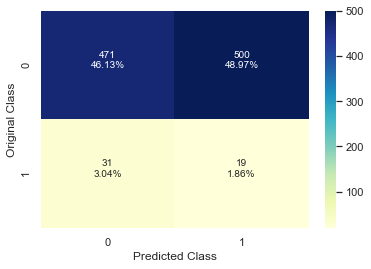

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


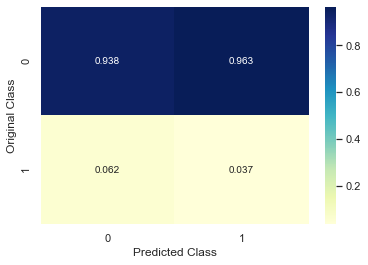

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


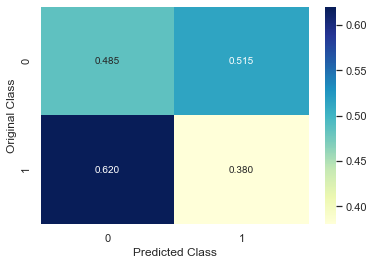

In [59]:
test_data_len = x_test.shape[0]
cv_data_len = x_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
    
# Test-Set error.
# We create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

predicted_y = np.argmax(test_predicted_y, axis=1)
predicted_cv = np.argmax(cv_predicted_y, axis=1)


ll_rm_cv = log_loss(y_cv,cv_predicted_y, eps=1e-15)
ac_rm_cv = accuracy_score(y_cv, predicted_cv)
ll_rm_te = log_loss(y_test,test_predicted_y, eps=1e-15)
ac_rm_te = accuracy_score(y_test, predicted_y)

print("Log loss on Cross Validation Data using Random Model",ll_rm_cv)
print("Log loss on Test Data using Random Model",ll_rm_te)
print('Accuracy on Cross Validation using Random Model', ac_rm_cv)
print('Accuracy on Test Data using Random Model', ac_rm_te)

cnf_matrix(y_test, predicted_y)

## Logistic Regression

### Hyperparameter Tuning

In [60]:
alpha = [10 ** x for x in range(-6, 4)]
params = {'alpha':alpha}
clf1 = SGDClassifier(loss='log', n_jobs=-1, random_state=42)
r_search = RandomizedSearchCV(clf1, param_distributions=params, return_train_score=True, random_state=42)
r_search.fit(x_tr, y_train)

RandomizedSearchCV(estimator=SGDClassifier(loss='log', n_jobs=-1,
                                           random_state=42),
                   param_distributions={'alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1, 1, 10, 100,
                                                  1000]},
                   random_state=42, return_train_score=True)

In [61]:
print(f'The best hyperparameter values is {r_search.best_params_} at which the score is {r_search.best_score_}')

The best hyperparameter values is {'alpha': 0.001} at which the score is 0.7689837365775675


### Training the model

In [62]:
clf1 = SGDClassifier(loss='log', n_jobs=-1, random_state=42, **r_search.best_params_)
clf1.fit(x_tr, y_train)
cal_clf1 = CalibratedClassifierCV(clf1, cv='prefit')
cal_clf1.fit(x_tr, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                                    n_jobs=-1,
                                                    random_state=42),
                       cv='prefit')

In [63]:
y_pred_cv = cal_clf1.predict(x_cv)
y_prob_cv = cal_clf1.predict_proba(x_cv)
y_pred = cal_clf1.predict(x_te)
y_prob = cal_clf1.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using Logistic Regression 0.5125195612125583
Log loss on Test Data using Logistic Regression 0.5231360585054503
Accuracy on Cross Validation using Logistic Regression 0.7490820073439413
Accuracy on Test Data using Logistic Regression 0.732615083251714
---------------------------------------- Confusion Matrix ----------------------------------------


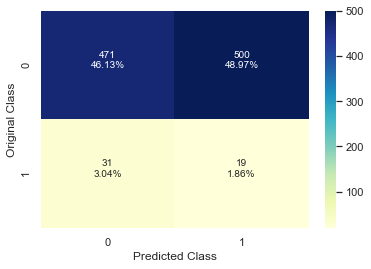

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


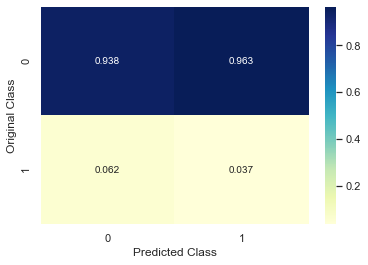

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


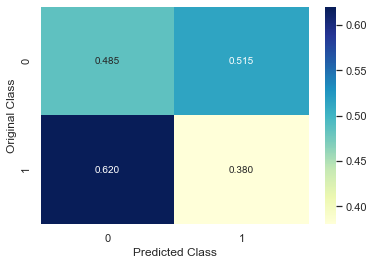

In [64]:
ll_lg_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_lg_cv = accuracy_score(y_cv, y_pred_cv)
ll_lg_te = log_loss(y_test, y_prob, eps=1e-15)
ac_lg_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using Logistic Regression",ll_lg_cv)
print("Log loss on Test Data using Logistic Regression",ll_lg_te)
print('Accuracy on Cross Validation using Logistic Regression', ac_lg_cv)
print('Accuracy on Test Data using Logistic Regression', ac_lg_te)

cnf_matrix(y_test, y_pred)

### Feature Importance

Feature: 0, Score: 0.08744457495307384
Feature: 1, Score: 0.08111951641250333
Feature: 2, Score: -0.018148049134373182
Feature: 3, Score: -0.017645247504174698
Feature: 4, Score: 0.16806128973537904
Feature: 5, Score: -0.264252568149695
Feature: 6, Score: -0.08060563419806256
Feature: 7, Score: 0.2271032318359398
Feature: 8, Score: -0.2002913243679036
Feature: 9, Score: 0.4684623371109256
Feature: 10, Score: 0.06417623241019317
Feature: 11, Score: 0.08623980982100894
Feature: 12, Score: -0.02709757925860014
Feature: 13, Score: 0.17847072939278436
Feature: 14, Score: -0.0979924720277727
Feature: 15, Score: 0.0970353641247913
Feature: 16, Score: 0.4312492605722929
Feature: 17, Score: 0.5463021567882967
Feature: 18, Score: 5.479479894677717
Feature: 19, Score: 0.595938424235832
Feature: 20, Score: -0.056844716975492406


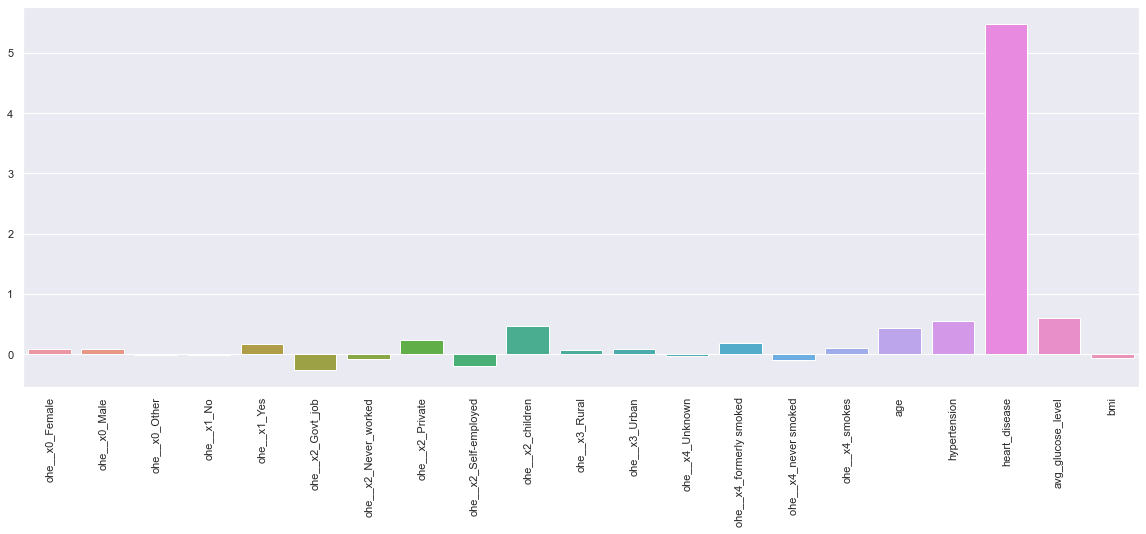

In [65]:
importance = clf1.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
    print(f'Feature: {i}, Score: {v}')

plt.figure(figsize=(20,7))    
sns.barplot(x=[x for x in range(importance.shape[1])], y=importance[0]).set_xticklabels(features, rotation=90)
plt.show()

## Support Vector Machines

### Hyperparameter Tuning

In [66]:
alpha = [10 ** x for x in range(-6, 4)]
params = {'alpha':alpha}
clf2 = SGDClassifier(loss='hinge', n_jobs=-1, random_state=42)
r_search = RandomizedSearchCV(clf2, param_distributions=params, return_train_score=True, random_state=42)
r_search.fit(x_tr, y_train)

RandomizedSearchCV(estimator=SGDClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1, 1, 10, 100,
                                                  1000]},
                   random_state=42, return_train_score=True)

In [67]:
print(f'The best hyperparameter values is {r_search.best_params_} at which the score is {r_search.best_score_}')

The best hyperparameter values is {'alpha': 0.0001} at which the score is 0.7747760448867355


### Training the model

In [68]:
clf2 = SGDClassifier(loss='hinge', n_jobs=-1, random_state=42, **r_search.best_params_)
clf2.fit(x_tr, y_train)
cal_clf2 = CalibratedClassifierCV(clf2, cv='prefit')
cal_clf2.fit(x_tr, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(n_jobs=-1, random_state=42),
                       cv='prefit')

In [69]:
y_pred_cv = cal_clf2.predict(x_cv)
y_prob_cv = cal_clf2.predict_proba(x_cv)
y_pred = cal_clf2.predict(x_te)
y_prob = cal_clf2.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using SVM 0.5183016042379512
Log loss on Test Data using SVM 0.5358896940741728
Accuracy on Cross Validation using SVM 0.7429620563035496
Accuracy on Test Data using SVM 0.7365328109696376
---------------------------------------- Confusion Matrix ----------------------------------------


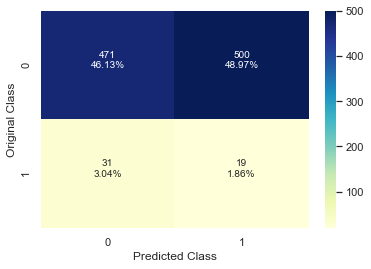

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


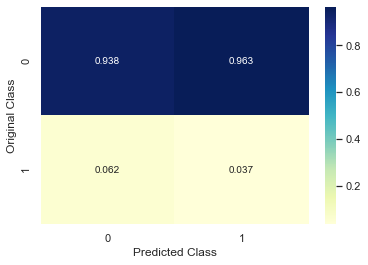

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


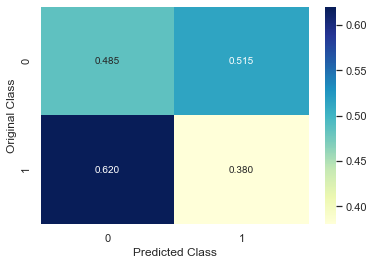

In [70]:
ll_svm_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_svm_cv = accuracy_score(y_cv, y_pred_cv)
ll_svm_te = log_loss(y_test, y_prob, eps=1e-15)
ac_svm_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using SVM",ll_svm_cv)
print("Log loss on Test Data using SVM",ll_svm_te)
print('Accuracy on Cross Validation using SVM', ac_svm_cv)
print('Accuracy on Test Data using SVM', ac_svm_te)

cnf_matrix(y_test, y_pred)

### Feature Importance

Feature: 0, Score: 0.891098813947435
Feature: 1, Score: 0.9208021077456798
Feature: 2, Score: 0.0
Feature: 3, Score: 1.009911989140427
Feature: 4, Score: 0.8019889325526858
Feature: 5, Score: -0.0891098813947417
Feature: 6, Score: 0.0
Feature: 7, Score: 0.29703293798247765
Feature: 8, Score: -0.14851646899123905
Feature: 9, Score: 1.7524943340966257
Feature: 10, Score: 0.683175757359692
Feature: 11, Score: 1.128725164333421
Feature: 12, Score: 0.47525270077196574
Feature: 13, Score: 0.4158461131754637
Feature: 14, Score: 0.23762635038598182
Feature: 15, Score: 0.6831757573597056
Feature: 16, Score: -1.3947300287990333e-14
Feature: 17, Score: 0.6534724635614665
Feature: 18, Score: 5.783585189417587
Feature: 19, Score: 0.27726708668090105
Feature: 20, Score: -0.033352637606561576


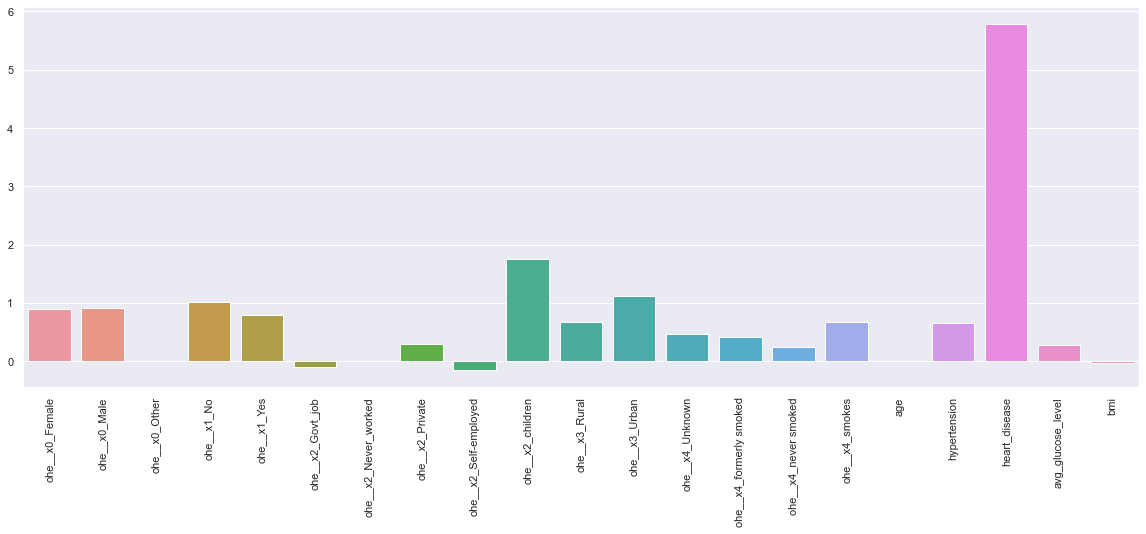

In [71]:
importance = clf2.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
    print(f'Feature: {i}, Score: {v}')

plt.figure(figsize=(20,7))    
sns.barplot(x=[x for x in range(importance.shape[1])], y=importance[0]).set_xticklabels(features, rotation=90)
plt.show()

## Naive Bayes

### Hyperparameter Tuning

In [72]:
alpha = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,50,100]
params = {'alpha':alpha}
clf3 = MultinomialNB()
r_search = RandomizedSearchCV(clf3, param_distributions=params, return_train_score=True, random_state=42)
r_search.fit(x_tr, y_train)

RandomizedSearchCV(estimator=MultinomialNB(),
                   param_distributions={'alpha': [1e-07, 1e-06, 1e-05, 0.0001,
                                                  0.001, 0.01, 0.1, 1, 10, 50,
                                                  100]},
                   random_state=42, return_train_score=True)

In [73]:
print(f'The best hyperparameter values is {r_search.best_params_} at which the score is {r_search.best_score_}')

The best hyperparameter values is {'alpha': 0.01} at which the score is 0.6703707967188602


### Training the model

In [74]:
clf3 = MultinomialNB(**r_search.best_params_)
clf3.fit(x_tr, y_train)
cal_clf3 = CalibratedClassifierCV(clf3, cv='prefit')
cal_clf3.fit(x_tr, y_train)

CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=0.01), cv='prefit')

In [75]:
y_pred_cv = cal_clf3.predict(x_cv)
y_prob_cv = cal_clf3.predict_proba(x_cv)
y_pred = cal_clf3.predict(x_te)
y_prob = cal_clf3.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using Naive Bayes 0.6304080630993817
Log loss on Test Data using Naive Bayes 0.5969289826648755
Accuracy on Cross Validation using Naive Bayes 0.5777233782129743
Accuracy on Test Data using Naive Bayes 0.6160626836434868
---------------------------------------- Confusion Matrix ----------------------------------------


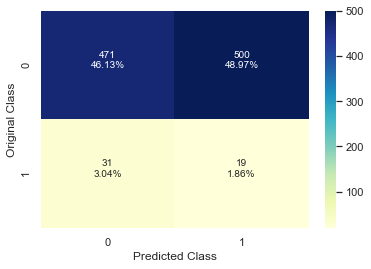

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


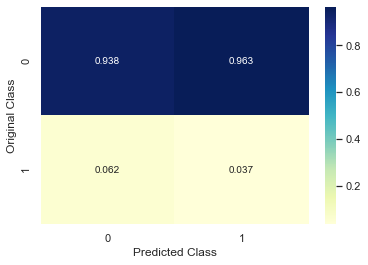

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


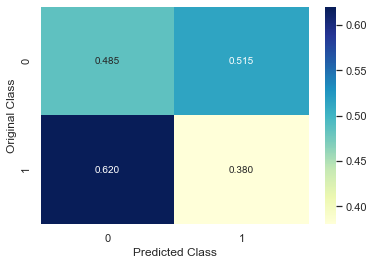

In [76]:
ll_nb_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_nb_cv = accuracy_score(y_cv, y_pred_cv)
ll_nb_te = log_loss(y_test, y_prob, eps=1e-15)
ac_nb_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using Naive Bayes",ll_nb_cv)
print("Log loss on Test Data using Naive Bayes",ll_nb_te)
print('Accuracy on Cross Validation using Naive Bayes', ac_nb_cv)
print('Accuracy on Test Data using Naive Bayes', ac_nb_te)

cnf_matrix(y_test, y_pred)

## Random Forest using Sklearn

### Hyperparameter Tuning

In [77]:
# Maximum number of levels in tree
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'log2', None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
params = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf4 = rgb(n_jobs=-1, random_state=42)
r_search = RandomizedSearchCV(clf4, param_distributions=params, return_train_score=True, random_state=42)
r_search.fit(x_tr, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True)

In [78]:
print(f'The best hyperparameter values are {r_search.best_params_} at which the score is {r_search.best_score_}')

The best hyperparameter values are {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80, 'bootstrap': True} at which the score is 0.9890604103235352


### Training the model

In [79]:
clf4 = rgb(**r_search.best_params_, n_jobs=-1, random_state=42)
clf4.fit(x_tr, y_train)
cal_clf4 = CalibratedClassifierCV(clf4, cv='prefit')
cal_clf4.fit(x_tr, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=80,
                                                             max_features='log2',
                                                             min_samples_split=10,
                                                             n_estimators=1400,
                                                             n_jobs=-1,
                                                             random_state=42),
                       cv='prefit')

In [80]:
y_pred_cv = cal_clf4.predict(x_cv)
y_prob_cv = cal_clf4.predict_proba(x_cv)
y_pred = cal_clf4.predict(x_te)
y_prob = cal_clf4.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using RF 0.3348050164010808
Log loss on Test Data using RF 0.3399874011973987
Accuracy on Cross Validation using RF 0.9424724602203183
Accuracy on Test Data using RF 0.9451518119490695
---------------------------------------- Confusion Matrix ----------------------------------------


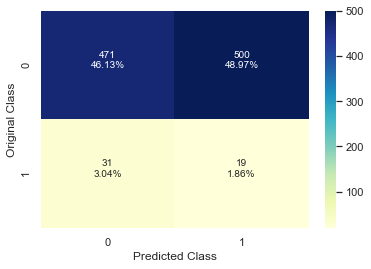

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


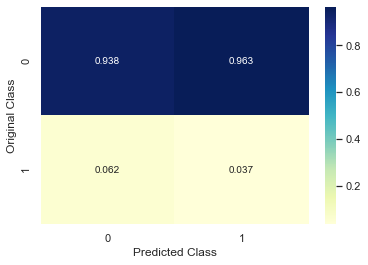

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


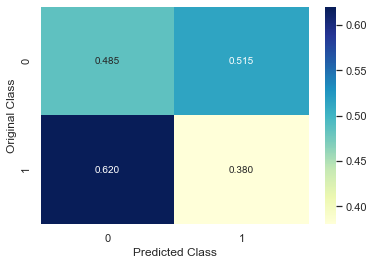

In [81]:
ll_rf_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_rf_cv = accuracy_score(y_cv, y_pred_cv)
ll_rf_te = log_loss(y_test, y_prob, eps=1e-15)
ac_rf_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using RF",ll_rf_cv)
print("Log loss on Test Data using RF",ll_rf_te)
print('Accuracy on Cross Validation using RF', ac_rf_cv)
print('Accuracy on Test Data using RF', ac_rf_te)

cnf_matrix(y_test, y_pred)

### Feature Importance

Feature: 0, Score: 0.012752798771207554
Feature: 1, Score: 0.013139025600361688
Feature: 2, Score: 2.616235320332209e-06
Feature: 3, Score: 0.02710540083742123
Feature: 4, Score: 0.02861370113588525
Feature: 5, Score: 0.013342904377548311
Feature: 6, Score: 4.943628701595869e-05
Feature: 7, Score: 0.016524918232487324
Feature: 8, Score: 0.014365108071047962
Feature: 9, Score: 0.011638684005633206
Feature: 10, Score: 0.013775553141228124
Feature: 11, Score: 0.013688283436881077
Feature: 12, Score: 0.016334701538669137
Feature: 13, Score: 0.01696287407025397
Feature: 14, Score: 0.019946127480100346
Feature: 15, Score: 0.0134679555440539
Feature: 16, Score: 0.029773739495578412
Feature: 17, Score: 0.023667986517847763
Feature: 18, Score: 0.35779219053178385
Feature: 19, Score: 0.1870918810423693
Feature: 20, Score: 0.1699641136473053


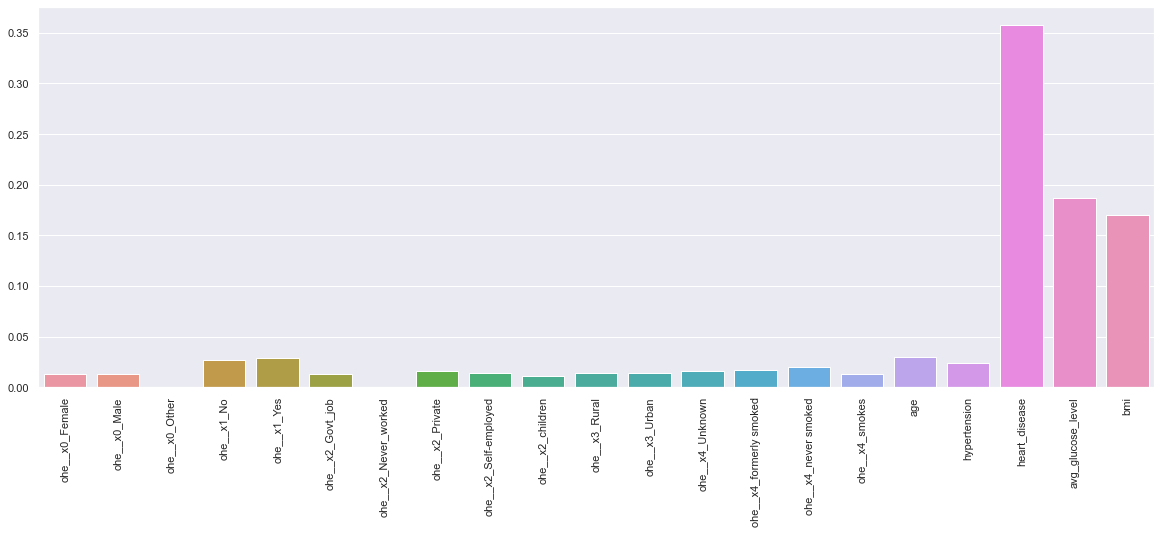

In [82]:
importance = clf4.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

plt.figure(figsize=(20,7))    
sns.barplot(x=[x for x in range(len(importance))], y=importance).set_xticklabels(features, rotation=90)
plt.show()

## Random Forest using Xgboost

### Hyperparameter Tuning

In [83]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

learning_rate = [x for x in np.linspace(start=0.01, stop=0.2, num=10)]

min_child_weight = [1, 3, 5, 7]

max_depth = [3, 5, 7, 9]

subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

colsample_bytree = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Create the random grid
params = {'n_estimators': n_estimators, 
          'learning_rate':learning_rate,
          'min_child_weight': min_child_weight,
          'max_depth': max_depth,
          'subsample': subsample,
          'colsample_bytree': colsample_bytree}
clf5 = xgb(n_jobs=-1, random_state=42)
r_search = RandomizedSearchCV(clf5, param_distributions=params, return_train_score=True, random_state=42)
r_search.fit(x_tr, y_train)

[22:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=-1,
                                             num_parallel_tree=None,
                                             objective='...
                                                          0.03111111111111111,
           

In [84]:
print(f'The best hyperparameter values are {r_search.best_params_} at which the score is {r_search.best_score_}')

The best hyperparameter values are {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.03111111111111111, 'colsample_bytree': 0.6} at which the score is 0.9628371614158258


### Training the model

In [85]:
clf5 = xgb(**r_search.best_params_, n_jobs=-1, random_state=42)
clf5.fit(x_tr, y_train)
cal_clf5 = CalibratedClassifierCV(clf5, cv='prefit')
cal_clf5.fit(x_tr, y_train)

[22:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


CalibratedClassifierCV(base_estimator=XGBRFClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bytree=0.6,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.03111111111111111,
                                                      max_delta_step=0,
                                                      max_depth=9,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints='()',
                       

In [86]:
y_pred_cv = cal_clf5.predict(x_cv)
y_prob_cv = cal_clf5.predict_proba(x_cv)
y_pred = cal_clf5.predict(x_te)
y_prob = cal_clf5.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using RF 0.5456568501282764
Log loss on Test Data using RF 0.6049738340084296
Accuracy on Cross Validation using RF 0.9363525091799265
Accuracy on Test Data using RF 0.930460333006856
---------------------------------------- Confusion Matrix ----------------------------------------


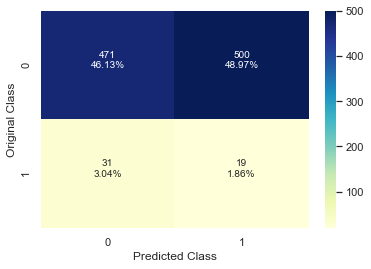

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


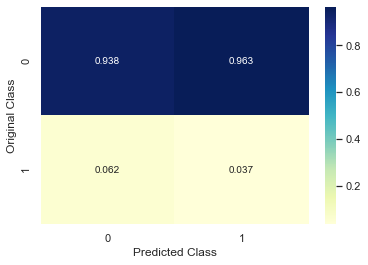

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


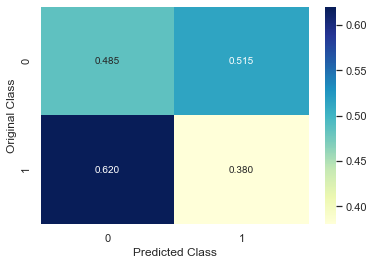

In [87]:
ll_xg_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_xg_cv = accuracy_score(y_cv, y_pred_cv)
ll_xg_te = log_loss(y_test, y_prob, eps=1e-15)
ac_xg_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using RF",ll_xg_cv)
print("Log loss on Test Data using RF",ll_xg_te)
print('Accuracy on Cross Validation using RF', ac_xg_cv)
print('Accuracy on Test Data using RF', ac_xg_te)

cnf_matrix(y_test, y_pred)

### Feature Importance

Feature: 0, Score: 0.014785390347242355
Feature: 1, Score: 0.016840120777487755
Feature: 2, Score: 0.0
Feature: 3, Score: 0.26061001420021057
Feature: 4, Score: 0.11831574887037277
Feature: 5, Score: 0.0228144321590662
Feature: 6, Score: 0.006446104031056166
Feature: 7, Score: 0.022581875324249268
Feature: 8, Score: 0.019605936482548714
Feature: 9, Score: 0.08927551656961441
Feature: 10, Score: 0.015692954882979393
Feature: 11, Score: 0.012989203445613384
Feature: 12, Score: 0.027522603049874306
Feature: 13, Score: 0.03213122859597206
Feature: 14, Score: 0.030077636241912842
Feature: 15, Score: 0.02024657279253006
Feature: 16, Score: 0.046271972358226776
Feature: 17, Score: 0.051927436143159866
Feature: 18, Score: 0.11803538352251053
Feature: 19, Score: 0.03629869595170021
Feature: 20, Score: 0.03753121197223663


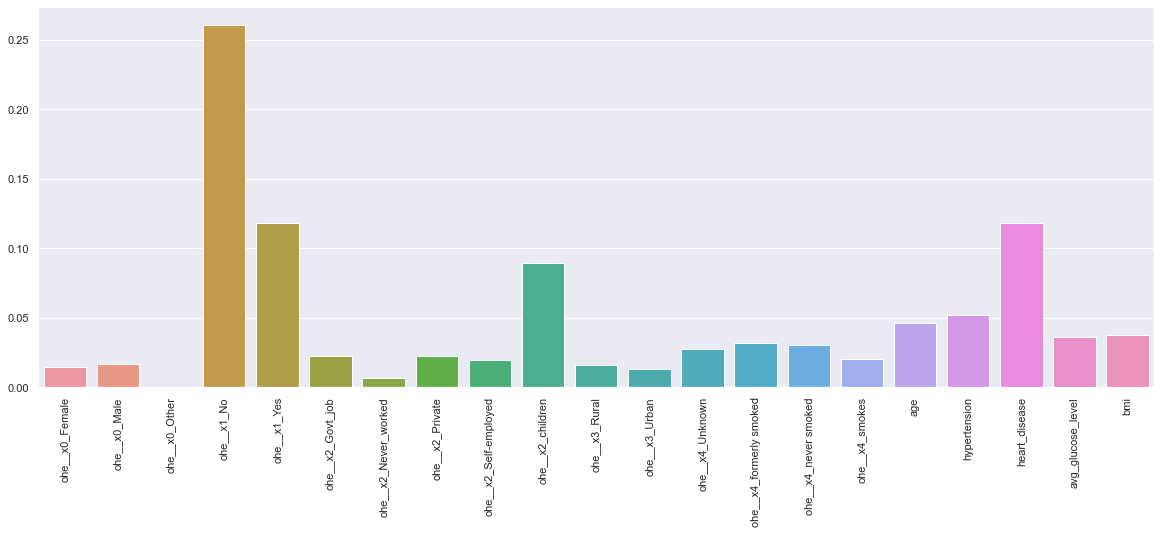

In [88]:
importance = clf5.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

plt.figure(figsize=(20,7))    
sns.barplot(x=[x for x in range(len(importance))], y=importance).set_xticklabels(features, rotation=90)
plt.show()

## Stacking Classifier

In [89]:
estimators = [('svc', clf2), ('nb', clf3), ('rf',  clf4)]

scl = StackingClassifier(estimators=estimators, final_estimator=clf1, n_jobs=-1)
scl.fit(x_tr, y_train)
cal_clf = CalibratedClassifierCV(scl, cv='prefit')
cal_clf.fit(x_tr, y_train)

CalibratedClassifierCV(base_estimator=StackingClassifier(estimators=[('svc',
                                                                      SGDClassifier(n_jobs=-1,
                                                                                    random_state=42)),
                                                                     ('nb',
                                                                      MultinomialNB(alpha=0.01)),
                                                                     ('rf',
                                                                      RandomForestClassifier(max_depth=80,
                                                                                             max_features='log2',
                                                                                             min_samples_split=10,
                                                                                             n_estimators=1400,
                           

In [90]:
y_pred_cv = cal_clf.predict(x_cv)
y_prob_cv = cal_clf.predict_proba(x_cv)
y_pred = cal_clf.predict(x_te)
y_prob = cal_clf.predict_proba(x_te)

### Performance of the model

Log loss on Cross Validation Data using Stacking Classifier 0.3339721346074445
Log loss on Test Data using Stacking Classifier 0.3394177727229881
Accuracy on Cross Validation using Stacking Classifier 0.9424724602203183
Accuracy on Test Data using Stacking Classifier 0.9451518119490695
---------------------------------------- Confusion Matrix ----------------------------------------


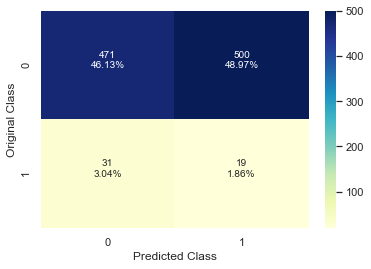

---------------------------------------- Precision matrix (Columm Sum=1) ----------------------------------------


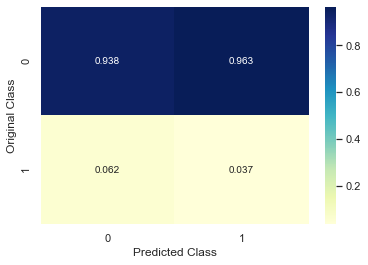

---------------------------------------- Recall matrix (Row sum=1) ----------------------------------------


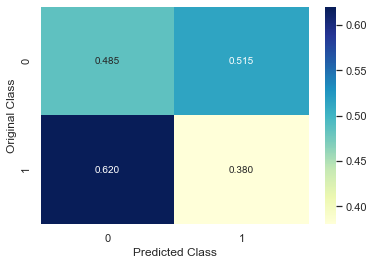

In [91]:
ll_sc_cv = log_loss(y_cv, y_prob_cv, eps=1e-15)
ac_sc_cv = accuracy_score(y_cv, y_pred_cv)
ll_sc_te = log_loss(y_test, y_prob, eps=1e-15)
ac_sc_te = accuracy_score(y_test, y_pred)


print("Log loss on Cross Validation Data using Stacking Classifier",ll_sc_cv)
print("Log loss on Test Data using Stacking Classifier",ll_sc_te)
print('Accuracy on Cross Validation using Stacking Classifier', ac_sc_cv)
print('Accuracy on Test Data using Stacking Classifier', ac_sc_te)

cnf_matrix(y_test, y_pred)

# Summary of Performance

In [92]:
table = PrettyTable()
table.field_names = ['Model', 'CV Log Loss', 'Test Log Loss', 'CV Accuracy', 'Test Accuracy']
table.add_rows([['Random Model', round(ll_rm_cv,3), round(ll_rm_te,4), round(ac_rm_cv,3), round(ac_rm_te,3)],
                ['Logistic Regression', round(ll_lg_cv,3), round(ll_lg_te,3), round(ac_lg_cv,3), round(ac_lg_te,3)],
                ['Naive Bayes', round(ll_nb_cv,3), round(ll_nb_te,3), round(ac_nb_cv,3), round(ac_nb_te,3)],
                ['SVM', round(ll_svm_cv,3), round(ll_svm_te,3), round(ac_svm_cv,3), round(ac_svm_te,3)],
                ['Random Forest(Scikit)', round(ll_rf_cv,3), round(ll_rf_te,3), round(ac_rf_cv,3), round(ac_rf_te,3)],
                ['Random Forest(Xgboost)', round(ll_xg_cv,3), round(ll_xg_te,3), round(ac_xg_cv,3), round(ac_xg_te,3)],
                ['Stacking Classifier', round(ll_sc_cv,3), round(ll_sc_te,3), round(ac_sc_cv,3), round(ac_sc_te,3)]])

In [93]:
table.set_style(DEFAULT)
print(table)

+------------------------+-------------+---------------+-------------+---------------+
|         Model          | CV Log Loss | Test Log Loss | CV Accuracy | Test Accuracy |
+------------------------+-------------+---------------+-------------+---------------+
|      Random Model      |    0.926    |     0.9333    |    0.461    |      0.48     |
|  Logistic Regression   |    0.513    |     0.523     |    0.749    |     0.733     |
|      Naive Bayes       |     0.63    |     0.597     |    0.578    |     0.616     |
|          SVM           |    0.518    |     0.536     |    0.743    |     0.737     |
| Random Forest(Scikit)  |    0.335    |      0.34     |    0.942    |     0.945     |
| Random Forest(Xgboost) |    0.546    |     0.605     |    0.936    |      0.93     |
|  Stacking Classifier   |    0.334    |     0.339     |    0.942    |     0.945     |
+------------------------+-------------+---------------+-------------+---------------+


So our best model is Random Forest using sklearn with **an accuracy of 94.5% and log loss of 0.339**